In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import svm

In [2]:
df=pd.read_csv(r'C:\Users\ella.gorgin\Dropbox\Data_Analytics\Data_sets\Food_delivery\train.csv', parse_dates=["Order_Date"], na_values=['NaN ','NaN'])
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,8:30:00,8:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,(min) 30


In [3]:
df.shape

(45593, 20)

In [4]:
df= df.drop_duplicates()
df.shape

(45593, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45593 non-null  object        
 1   Delivery_person_ID           45593 non-null  object        
 2   Delivery_person_Age          43739 non-null  float64       
 3   Delivery_person_Ratings      43685 non-null  float64       
 4   Restaurant_latitude          45593 non-null  float64       
 5   Restaurant_longitude         45593 non-null  float64       
 6   Delivery_location_latitude   45593 non-null  float64       
 7   Delivery_location_longitude  45593 non-null  float64       
 8   Order_Date                   45593 non-null  datetime64[ns]
 9   Time_Orderd                  43862 non-null  object        
 10  Time_Order_picked            45593 non-null  object        
 11  Weatherconditions            45593 non-nu

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,43739.0,29.567137,5.815155,15.000000,25.000000,30.000000,35.000000,50.000000
Delivery_person_Ratings,43685.0,4.633780,0.334716,1.000000,4.500000,4.700000,4.900000,6.000000
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000
multiple_deliveries,44600.0,0.744664,0.572473,0.000000,0.000000,1.000000,1.000000,3.000000


In [7]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

# Renaming columns

In [8]:
df.rename(columns = {'Time_Orderd':'Time_Ordered', 'ID':'Customer_ID','Road_traffic_density':'Traffic_conditions',\
                     'Weatherconditions':'Weather_conditions'}, inplace=True)
df.head()

,Customer_ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Ordered,Time_Order_picked,Weather_conditions,Traffic_conditions,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,8:30:00,8:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,(min) 30


# Order-Date column

In [9]:
df['day'] = df['Order_Date'].map(lambda x: x.day)
df['month'] = df['Order_Date'].map(lambda x: x.month)
df['year'] = df['Order_Date'].map(lambda x: x.year)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45593 entries, 0 to 45592
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Customer_ID                  45593 non-null  object        
 1   Delivery_person_ID           45593 non-null  object        
 2   Delivery_person_Age          43739 non-null  float64       
 3   Delivery_person_Ratings      43685 non-null  float64       
 4   Restaurant_latitude          45593 non-null  float64       
 5   Restaurant_longitude         45593 non-null  float64       
 6   Delivery_location_latitude   45593 non-null  float64       
 7   Delivery_location_longitude  45593 non-null  float64       
 8   Order_Date                   45593 non-null  datetime64[ns]
 9   Time_Ordered                 43862 non-null  object        
 10  Time_Order_picked            45593 non-null  object        
 11  Weather_conditions           45593 non-nu

# Time taken(min)

In [11]:
df['Delivery_person_Age'].head()

0    37.0
1    34.0
2    23.0
3    38.0
4    32.0
Name: Delivery_person_Age, dtype: float64

In [12]:
df['Time_taken(min)']=df['Time_taken(min)'].apply(lambda x: int(x.split(' ')[1]))
df['Time_taken(min)'].head()

0    24
1    33
2    26
3    21
4    30
Name: Time_taken(min), dtype: int64

In [13]:
print('The delivery time takes betwwen' , df['Time_taken(min)'].min(), 'to', df['Time_taken(min)'].max(), 'minutes!')

The delivery time takes betwwen 10 to 54 minutes!


C:\Users\ella.gorgin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


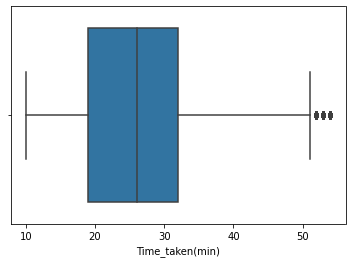

In [14]:
sns.boxplot(df['Time_taken(min)'])
plt.show()

In [15]:
df=df[df['Time_taken(min)']<52]

# Delivery person age

In [16]:
df.groupby('Delivery_person_Age')['Delivery_person_Age'].aggregate('count')

Delivery_person_Age
15.0      38
20.0    2131
21.0    2145
22.0    2188
23.0    2084
24.0    2207
25.0    2170
26.0    2155
27.0    2143
28.0    2176
29.0    2187
30.0    2204
31.0    2095
32.0    2179
33.0    2164
34.0    2150
35.0    2246
36.0    2237
37.0    2207
38.0    2202
39.0    2125
50.0      53
Name: Delivery_person_Age, dtype: int64

C:\Users\ella.gorgin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


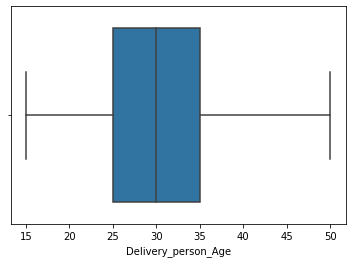

In [17]:
sns.boxplot(df['Delivery_person_Age'])
plt.show()

<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Count'>

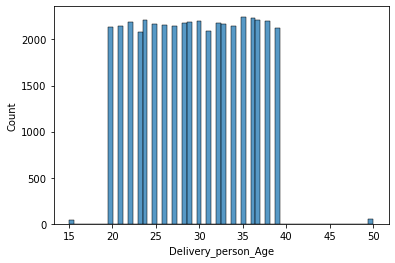

In [18]:
sns.histplot(df['Delivery_person_Age'])

In [19]:
df['Delivery_person_Age']=df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].mean())

#  Delivery person ratings 

In [20]:
df.groupby('Delivery_person_Ratings')['Delivery_person_Ratings'].aggregate('count')

Delivery_person_Ratings
1.0      38
2.5      20
2.6      22
2.7      22
2.8      19
2.9      19
3.0       6
3.1      29
3.2      29
3.3      25
3.4      32
3.5     247
3.6     201
3.7     220
3.8     227
3.9     190
4.0    1067
4.1    1413
4.2    1399
4.3    1390
4.4    1345
4.5    3285
4.6    6903
4.7    7117
4.8    7122
4.9    7016
5.0    3976
6.0      53
Name: Delivery_person_Ratings, dtype: int64

<AxesSubplot:xlabel='Delivery_person_Ratings', ylabel='Count'>

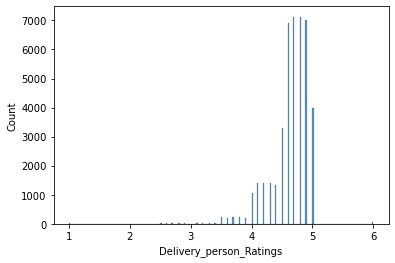

In [21]:
sns.histplot(df['Delivery_person_Ratings'])

C:\Users\ella.gorgin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


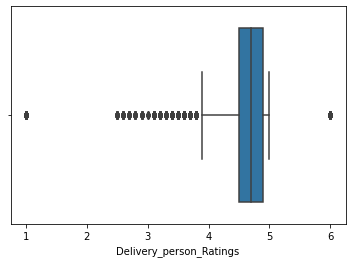

In [22]:
sns.boxplot(df['Delivery_person_Ratings'])
plt.show()

In [23]:
max_quantile= df['Delivery_person_Ratings'].quantile(1)
min_quantile=df['Delivery_person_Ratings'].quantile(0.05)
df=df[(df['Delivery_person_Ratings']<max_quantile) & (df['Delivery_person_Ratings']>min_quantile)]

In [24]:
df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median())

# Time ordered

In [25]:
df.groupby('Time_Ordered')['Time_Ordered'].aggregate('count')

Time_Ordered
0:00:00     408
10:00:00    206
10:10:00    144
10:15:00    166
10:20:00    181
           ... 
9:35:00     157
9:40:00     169
9:45:00     164
9:50:00     176
9:55:00     178
Name: Time_Ordered, Length: 176, dtype: int64

In [26]:
df['Time_Ordered'].mode()[0]

'17:55:00'

In [27]:
df['Time_Ordered']=df['Time_Ordered'].fillna(df['Time_Ordered'].mode()[0])

In [28]:
#df=df.dropna(subset=['Time_Ordered'], axis=0)
#df.shape

In [29]:
df['Time_Ordered_hour']=df['Time_Ordered'].apply(lambda x: x.split(':')[0])
df['Time_Ordered_hour'].head()

0    11
1    19
2     8
3    18
4    13
Name: Time_Ordered_hour, dtype: object

In [30]:
df['Time_Ordered_minute']=df['Time_Ordered'].apply(lambda x: x.split(':')[1])
df['Time_Ordered_minute'].head()

0    30
1    45
2    30
3    00
4    30
Name: Time_Ordered_minute, dtype: object

In [31]:
df['Time_Ordered_hour']= df['Time_Ordered_hour'].astype('float64')
df['Time_Ordered_minute']= df['Time_Ordered_minute'].astype('float64')

# Time order picked

In [32]:
df.groupby('Time_Order_picked')['Time_Order_picked'].aggregate('count')

Time_Order_picked
0:00:00     392
0:05:00     386
0:10:00     249
0:15:00     153
10:00:00    182
           ... 
9:35:00     177
9:40:00     141
9:45:00     173
9:50:00     161
9:55:00     156
Name: Time_Order_picked, Length: 193, dtype: int64

In [33]:
df['Time_Order_picked_hour']=df['Time_Order_picked'].apply(lambda x: x.split(':')[0])
df['Time_Order_picked_hour'].head()

0    11
1    19
2     8
3    18
4    13
Name: Time_Order_picked_hour, dtype: object

In [34]:
df['Time_Order_picked_minute']=df['Time_Order_picked'].apply(lambda x: x.split(':')[1])
df['Time_Order_picked_minute'].head()

0    45
1    50
2    45
3    10
4    45
Name: Time_Order_picked_minute, dtype: object

In [35]:
df['Time_Order_picked_hour']= df['Time_Order_picked_hour'].astype('float64')
df['Time_Order_picked_minute']= df['Time_Order_picked_minute'].astype('float64')

# Creating a new feature, prep_time

In [36]:
time_list=[]
for i in range(len(df['Time_Ordered'])):
    if df['Time_Ordered_hour'].iloc[i]== df['Time_Order_picked_hour'].iloc[i]:
        time_list.append(df['Time_Order_picked_minute'].iloc[i]-df['Time_Ordered_minute'].iloc[i])
    else:
        time_list.append(60-df['Time_Ordered_minute'].iloc[i]+df['Time_Order_picked_minute'].iloc[i])
    

In [37]:
# the prep time feature shows the amount of time it takes from order being placed to the order being picked by the delivery person
# the time taken feature shows the amount of time it takes from order being placed to the order being delivered by the delivery person
df['prep_time']=time_list

In [38]:
min=df['prep_time'].min()
max= df['prep_time'].max()

In [39]:
print('The prep time takes betwwen' , min, 'to', max, 'minutes!')

The prep time takes betwwen 5.0 to 15.0 minutes!


In [40]:
df.head()

,Customer_ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Ordered,...,City,Time_taken(min),day,month,year,Time_Ordered_hour,Time_Ordered_minute,Time_Order_picked_hour,Time_Order_picked_minute,prep_time
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,...,Urban,24,19,3,2022,11.0,30.0,11.0,45.0,15.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,...,Metropolitian,33,25,3,2022,19.0,45.0,19.0,50.0,5.0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,8:30:00,...,Urban,26,19,3,2022,8.0,30.0,8.0,45.0,15.0
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,18:00:00,...,Metropolitian,21,4,5,2022,18.0,0.0,18.0,10.0,10.0
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,...,Metropolitian,30,26,3,2022,13.0,30.0,13.0,45.0,15.0


# Weather conditions 

In [41]:
df.groupby('Weather_conditions')['Weather_conditions'].aggregate('count')

Weather_conditions
conditions Cloudy        6887
conditions Fog           7080
conditions Sandstorms    6742
conditions Stormy        6868
conditions Sunny         6617
conditions Windy         6772
Name: Weather_conditions, dtype: int64

In [42]:
df['Weather_conditions'] = df['Weather_conditions'].replace(['conditions NaN'],  df['Weather_conditions'].mode()[0])

In [43]:
df.groupby('Weather_conditions')['Weather_conditions'].aggregate('count')

Weather_conditions
conditions Cloudy        6887
conditions Fog           7080
conditions Sandstorms    6742
conditions Stormy        6868
conditions Sunny         6617
conditions Windy         6772
Name: Weather_conditions, dtype: int64

In [44]:
df=df.replace({'Weather_conditions':{'conditions Cloudy': 'Cloudy', 'conditions Fog':'Fog','conditions Sandstorms'\
                                     :'Sandstorms','conditions Stormy':'Stormy', 'conditions Sunny':'Sunny','conditions Windy':'Windy'}})

<AxesSubplot:xlabel='Weather_conditions', ylabel='Time_taken(min)'>

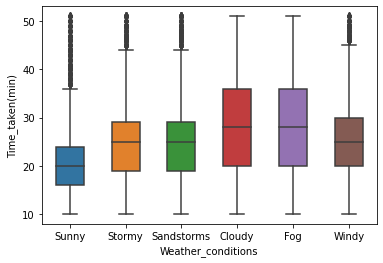

In [45]:
sns.boxplot(data=df, x='Weather_conditions', y='Time_taken(min)', width=0.5)

# 	Road traffic density 

In [46]:
df.groupby('Traffic_conditions')['Traffic_conditions'].aggregate('count')

Traffic_conditions
High        4095
Jam        12426
Low        14263
Medium     10182
Name: Traffic_conditions, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

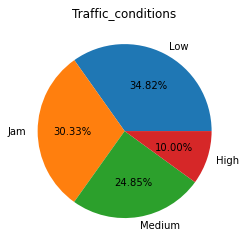

In [47]:
plt.pie(x = df['Traffic_conditions'].value_counts() ,autopct='%1.2f%%' ,labels=df['Traffic_conditions'].value_counts().index)
plt.title('Traffic_conditions')
plt.show

### Taking care of NA values in Traffic_conditions columns

In [48]:
df['Traffic_conditions'] = df['Traffic_conditions'].fillna(df['Traffic_conditions'].mode()[0])

<AxesSubplot:xlabel='Traffic_conditions', ylabel='Time_taken(min)'>

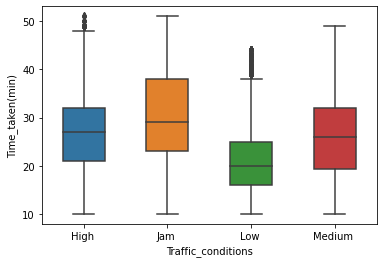

In [49]:
sns.boxplot(data=df, x='Traffic_conditions', y='Time_taken(min)', width=0.5)

# Type of order

In [50]:
df.groupby('Type_of_order')['Type_of_order'].aggregate('count')

Type_of_order
Buffet     10141
Drinks     10183
Meal       10265
Snack      10377
Name: Type_of_order, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

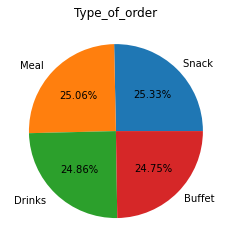

In [51]:
plt.pie(x = df['Type_of_order'].value_counts() ,autopct='%1.2f%%' ,labels=df['Type_of_order'].value_counts().index)
plt.title('Type_of_order')
plt.show

# Type of vehicle 

In [52]:
df.groupby('Type_of_vehicle')['Type_of_vehicle'].aggregate('count')

Type_of_vehicle
electric_scooter      3343
motorcycle           23923
scooter              13700
Name: Type_of_vehicle, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

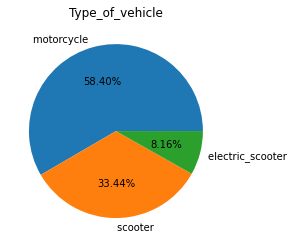

In [53]:
plt.pie(x = df['Type_of_vehicle'].value_counts() ,autopct='%1.2f%%' ,labels=df['Type_of_vehicle'].value_counts().index)
plt.title('Type_of_vehicle')
plt.show

<AxesSubplot:xlabel='Type_of_vehicle', ylabel='Time_taken(min)'>

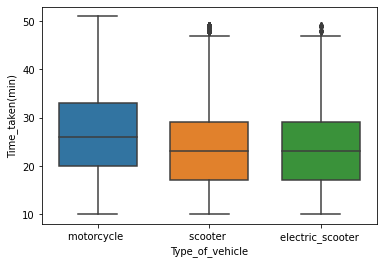

In [54]:
sns.boxplot(data=df, x='Type_of_vehicle', y='Time_taken(min)', width=0.7)

# Vehicle condition

In [55]:
df.groupby('Vehicle_condition')['Vehicle_condition'].aggregate('count')

Vehicle_condition
0    13576
1    13661
2    13729
Name: Vehicle_condition, dtype: int64

<AxesSubplot:xlabel='Vehicle_condition', ylabel='Time_taken(min)'>

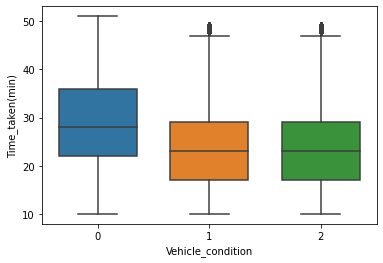

In [56]:
sns.boxplot(data=df, x='Vehicle_condition', y='Time_taken(min)', width=0.7)

# Multiple deliveries

In [57]:
df.groupby('multiple_deliveries')['multiple_deliveries'].aggregate('count')

multiple_deliveries
0.0    13011
1.0    25274
2.0     1547
3.0      245
Name: multiple_deliveries, dtype: int64

C:\Users\ella.gorgin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


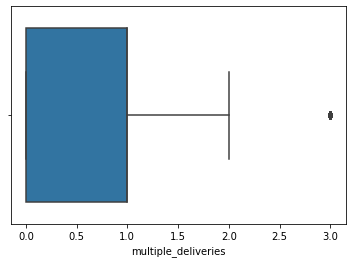

In [58]:
sns.boxplot(df['multiple_deliveries'])
plt.show()

In [59]:
max_quantile= df['Delivery_person_Ratings'].quantile(0.95)
df=df[df['Delivery_person_Ratings']<max_quantile]


In [60]:
# df['multiple_deliveries'] = df['multiple_deliveries'].replace(['nan'],  df['multiple_deliveries'].mode()[0])
df['multiple_deliveries'] = df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0])

# City 

In [61]:
df.groupby('City')['City'].aggregate('count')

City
Metropolitian     27467
Semi-Urban           80
Urban              8452
Name: City, dtype: int64

In [62]:
df['City'].isnull().sum()

991

In [63]:
df.dropna(subset = ['City'])

,Customer_ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Ordered,...,City,Time_taken(min),day,month,year,Time_Ordered_hour,Time_Ordered_minute,Time_Order_picked_hour,Time_Order_picked_minute,prep_time
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,...,Urban,24,19,3,2022,11.0,30.0,11.0,45.0,15.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,...,Metropolitian,33,25,3,2022,19.0,45.0,19.0,50.0,5.0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,8:30:00,...,Urban,26,19,3,2022,8.0,30.0,8.0,45.0,15.0
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,18:00:00,...,Metropolitian,21,4,5,2022,18.0,0.0,18.0,10.0,10.0
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,...,Metropolitian,30,26,3,2022,13.0,30.0,13.0,45.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,...,Metropolitian,32,24,3,2022,11.0,35.0,11.0,45.0,10.0
45589,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,...,Metropolitian,36,16,2,2022,19.0,55.0,20.0,10.0,15.0
45590,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-11-03,23:50:00,...,Metropolitian,16,3,11,2022,23.0,50.0,0.0,5.0,15.0
45591,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-07-03,13:35:00,...,Metropolitian,26,3,7,2022,13.0,35.0,13.0,40.0,5.0


<AxesSubplot:xlabel='City', ylabel='Time_taken(min)'>

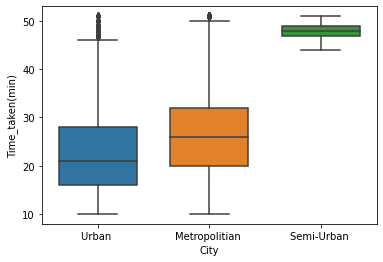

In [64]:
sns.boxplot(data=df, x='City', y='Time_taken(min)', width=0.7)

# Festival 

In [65]:
df.groupby('Festival')['Festival'].aggregate('count')

Festival
No      36224
Yes       572
Name: Festival, dtype: int64

In [66]:
df.dropna(subset = ['Festival'])

,Customer_ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Ordered,...,City,Time_taken(min),day,month,year,Time_Ordered_hour,Time_Ordered_minute,Time_Order_picked_hour,Time_Order_picked_minute,prep_time
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,...,Urban,24,19,3,2022,11.0,30.0,11.0,45.0,15.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,...,Metropolitian,33,25,3,2022,19.0,45.0,19.0,50.0,5.0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,8:30:00,...,Urban,26,19,3,2022,8.0,30.0,8.0,45.0,15.0
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,18:00:00,...,Metropolitian,21,4,5,2022,18.0,0.0,18.0,10.0,10.0
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,...,Metropolitian,30,26,3,2022,13.0,30.0,13.0,45.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,...,Metropolitian,32,24,3,2022,11.0,35.0,11.0,45.0,10.0
45589,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,...,Metropolitian,36,16,2,2022,19.0,55.0,20.0,10.0,15.0
45590,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-11-03,23:50:00,...,Metropolitian,16,3,11,2022,23.0,50.0,0.0,5.0,15.0
45591,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-07-03,13:35:00,...,Metropolitian,26,3,7,2022,13.0,35.0,13.0,40.0,5.0


<AxesSubplot:xlabel='Festival', ylabel='Time_taken(min)'>

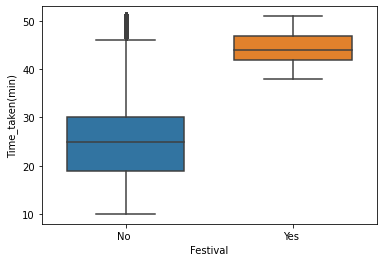

In [67]:
sns.boxplot(data=df, x='Festival', y='Time_taken(min)', width=0.7)

In [68]:
df.shape

(36990, 28)

In [69]:
#df['Time_Ordered']= df['Time_Ordered'].astype('float64')
#df['Time_Order_picked']= df['Time_Order_picked'].astype('float64')
df['multiple_deliveries']= df['multiple_deliveries'].astype('float64')
df['Time_taken(min)']= df['Time_taken(min)'].astype('float64')

# Creating a new feature, distance calculation

In [70]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in mile
R = 3950 
def distance_calculator(lat1,lon1,lat2,lon2):
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return(distance)

In [71]:
dist=[]
for i in range(len(df)):
    dist.append(distance_calculator(df["Restaurant_latitude"].iloc[i],df["Restaurant_longitude"].iloc[i],df["Delivery_location_latitude"].iloc[i],df["Delivery_location_longitude"].iloc[i]))

In [72]:
df['Distance']=dist
df['Distance'].head()

0     1.875583
1    12.513725
2     0.962705
3     4.830024
4     3.850266
Name: Distance, dtype: float64

In [73]:
df=df.drop(["Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude"], axis='columns')


C:\Users\ella.gorgin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


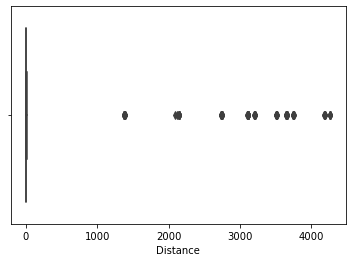

In [74]:
sns.boxplot(df['Distance'])
plt.show()

In [75]:
df['Distance'].min()

0.9083371920675309

In [76]:
df['Distance'].max()

4267.536005798192

In [77]:
max_quantile= df['Distance'].quantile(0.99)
df=df[df['Distance']<max_quantile]

In [78]:
df['Distance'].max()

12.92791340418967

C:\Users\ella.gorgin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


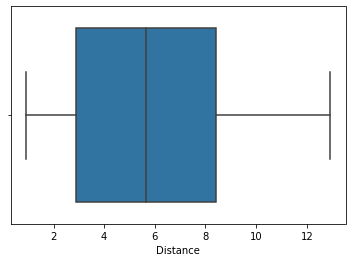

In [79]:
sns.boxplot(df['Distance'])
plt.show()

In [80]:
df.reset_index(inplace=True, drop=True)

# Label Encoding

In [81]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [82]:
df["Weather_conditions"]=labelencoder.fit_transform(df["Weather_conditions"])
df["Delivery_person_ID"]=labelencoder.fit_transform(df["Delivery_person_ID"])
df["Customer_ID"]=labelencoder.fit_transform(df["Customer_ID"])
df["Traffic_conditions"]=labelencoder.fit_transform(df['Traffic_conditions'])
df["Type_of_order"]=labelencoder.fit_transform(df["Type_of_order"])
df["Type_of_vehicle"]=labelencoder.fit_transform(df["Type_of_vehicle"])
df["City"]=labelencoder.fit_transform(df["City"])
df["Festival"]=labelencoder.fit_transform(df["Festival"])

In [83]:
df.head()

,Customer_ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Ordered,Time_Order_picked,Weather_conditions,Traffic_conditions,Vehicle_condition,...,Time_taken(min),day,month,year,Time_Ordered_hour,Time_Ordered_minute,Time_Order_picked_hour,Time_Order_picked_minute,prep_time,Distance
0,9059,637,37.0,4.9,2022-03-19,11:30:00,11:45:00,4,0,2,...,24.0,19,3,2022,11.0,30.0,11.0,45.0,15.0,1.875583
1,28316,232,34.0,4.5,2022-03-25,19:45:00,19:50:00,3,1,2,...,33.0,25,3,2022,19.0,45.0,19.0,50.0,5.0,12.513725
2,13168,234,23.0,4.4,2022-03-19,8:30:00,8:45:00,2,2,0,...,26.0,19,3,2022,8.0,30.0,8.0,45.0,15.0,0.962705
3,18180,397,38.0,4.7,2022-05-04,18:00:00,18:10:00,4,3,0,...,21.0,4,5,2022,18.0,0.0,18.0,10.0,10.0,4.830024
4,16441,333,32.0,4.6,2022-03-26,13:30:00,13:45:00,0,0,1,...,30.0,26,3,2022,13.0,30.0,13.0,45.0,15.0,3.850266


# Model processing

In [84]:
X=df.drop(['Time_taken(min)','Order_Date','Time_Ordered','Time_Order_picked','year'], axis='columns')
X

,Customer_ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Traffic_conditions,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,day,month,Time_Ordered_hour,Time_Ordered_minute,Time_Order_picked_hour,Time_Order_picked_minute,prep_time,Distance
0,9059,637,37.0,4.9,4,0,2,3,1,0.0,0,2,19,3,11.0,30.0,11.0,45.0,15.0,1.875583
1,28316,232,34.0,4.5,3,1,2,3,2,1.0,0,0,25,3,19.0,45.0,19.0,50.0,5.0,12.513725
2,13168,234,23.0,4.4,2,2,0,1,1,1.0,0,2,19,3,8.0,30.0,8.0,45.0,15.0,0.962705
3,18180,397,38.0,4.7,4,3,0,0,1,1.0,0,0,4,5,18.0,0.0,18.0,10.0,10.0,4.830024
4,16441,333,32.0,4.6,0,0,1,3,2,1.0,0,0,26,3,13.0,30.0,13.0,45.0,15.0,3.850266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36610,18494,672,30.0,4.8,5,0,1,2,1,0.0,0,0,24,3,11.0,35.0,11.0,45.0,10.0,0.923700
36611,34187,45,21.0,4.6,5,1,0,0,1,1.0,0,0,16,2,19.0,55.0,20.0,10.0,15.0,6.824761
36612,10717,326,30.0,4.9,0,2,1,1,2,0.0,0,0,3,11,23.0,50.0,0.0,5.0,15.0,2.887447
36613,13433,390,20.0,4.7,0,0,0,3,1,1.0,0,0,3,7,13.0,35.0,13.0,40.0,5.0,3.864064


# Feature scaling
#### feature_range=(0, 1)

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)

In [86]:
y=df['Time_taken(min)']

## train_test_split

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Regression models

In [89]:
DTR = DecisionTreeRegressor(max_features=10)
KNN=KNeighborsRegressor(n_neighbors=6)
RFR = RandomForestRegressor(n_estimators=40,random_state=5)
LR = LinearRegression()

In [90]:
Models = {"Decision tree" : DTR,
          "KNeighbors Regressor" : KNN,
          "Random forest" : RFR,
          "Linear Regression" : LR}
scores= { }
MSE={ }

In [91]:
for key, value in Models.items():   
    print(key)
    model = value
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    scores[key] = model.score(X_test, y_test)
    MSE[key]=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Decision tree
KNeighbors Regressor
Random forest
Linear Regression


In [92]:
scores_frame = pd.DataFrame(scores,index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
Random forest,0.822171
Decision tree,0.659656
KNeighbors Regressor,0.520587
Linear Regression,0.472646


In [93]:
scores_frame = pd.DataFrame(MSE,index=["Root Mean Squared Error"]).T
scores_frame.sort_values(by=["Root Mean Squared Error"], axis=0 ,ascending=True, inplace=True)
scores_frame

,Root Mean Squared Error
Random forest,3.789983
Decision tree,5.243178
KNeighbors Regressor,6.222868
Linear Regression,6.526601


# K-fold Cross Validation

In [94]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5,shuffle=True)

In [95]:
def get_score(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [96]:
score_LR=[]
score_SVM=[]
score_RFR=[]
score_KNN=[]
score_DTR=[]
for train_index, test_index in cv.split(X,y):
    X_train, X_test, y_train, y_test=X[train_index],X[test_index],y[train_index],y[test_index]
    score_LR.append(get_score(LR,X_train, X_test, y_train, y_test))
    score_RFR.append(get_score(RFR,X_train, X_test, y_train, y_test))
    score_KNN.append(get_score(KNN,X_train, X_test, y_train, y_test))
    score_DTR.append(get_score(DTR,X_train, X_test, y_train, y_test))
print('Ran_for_score =', np.mean(score_RFR))
print('Lin_reg_score =', np.mean(score_LR))
print('KNN_score =', np.mean(score_KNN))
print('Des_tre_score =', np.mean(score_DTR))

Ran_for_score = 0.820850460583519
Lin_reg_score = 0.46409154876159925
KNN_score = 0.5152392508313969
Des_tre_score = 0.6550892836247862


In [97]:
#from sklearn.feature_selection import RFE
#rfe = RFE(estimator =RandomForestRegressor(), n_features_to_select=10, step=1)
#rfe=rfe.fit(X, y)
#rfe.ranking_

# Feature importances

In [98]:
XX=df.drop(['Time_taken(min)','Order_Date','Time_Ordered','Time_Order_picked','year'], axis='columns')

In [99]:
feature_list=list(XX.columns)

In [100]:
feature_imp=pd.Series(RFR.feature_importances_, index=feature_list).sort_values(ascending=False)

In [101]:
feature_imp

Delivery_person_Ratings     0.179627
Weather_conditions          0.169276
multiple_deliveries         0.110921
Distance                    0.109580
Traffic_conditions          0.090430
Delivery_person_Age         0.081448
Time_Ordered_hour           0.068758
Vehicle_condition           0.067566
Customer_ID                 0.023068
Delivery_person_ID          0.022940
Time_Order_picked_hour      0.011542
day                         0.011069
Time_Order_picked_minute    0.010380
Time_Ordered_minute         0.010258
Festival                    0.006964
month                       0.006851
Type_of_order               0.006743
City                        0.004906
prep_time                   0.004875
Type_of_vehicle             0.002800
dtype: float64